<a href="https://colab.research.google.com/github/smha-Promedius/vit_lecture/blob/master/notebook/02_vit_train.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt-get install -y fonts-nanum* | tail -n 1
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 4.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 31 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such 

## 라이브러리 & 커맨드 준비

In [ ]:
# 필요 라이브러리 설치

!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1
w = !apt install tree
print(w[-2])

Setting up tree (1.7.0-5) ...


* 모든 설치가 끝나면 한글 폰트를 바르게 출력하기 위해 **[런타임]** -> **[런타임 다시시작]**을 클릭한 다음, 아래 셀부터 코드를 실행해 주십시오.

In [ ]:
# 라이브러리 임포트

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

# 폰트 관련 용도
import matplotlib.font_manager as fm

# 나눔 고딕 폰트의 경로 명시
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = fm.FontProperties(fname=path, size=10).get_name()

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchinfo import summary
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

## 초기설정

In [ ]:
# warning 표시 끄기
import warnings
warnings.simplefilter('ignore')

# 기본 폰트 설정
plt.rcParams['font.family'] = font_name

# 기본 폰트 사이즈 변경
plt.rcParams['font.size'] = 14

# 기본 그래프 사이즈 변경
plt.rcParams['figure.figsize'] = (6,6)

# 기본 그리드 표시
# 필요에 따라 설정할 때는, plt.grid()
plt.rcParams['axes.grid'] = True

# 마이너스 기호 정상 출력
plt.rcParams['axes.unicode_minus'] = False

# 넘파이 부동소수점 자릿수 표시
np.set_printoptions(suppress=True, precision=4)

In [ ]:
# GPU 디바이스 할당

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# 공통함수 다운로드
!git clone https://github.com/smha-Promedius/pythonlibs.git

# 공통함수 임포트
from pythonlibs.torch_lib1 import *

# 공통함수 체크
print(README)

Cloning into 'pythonlibs'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 64 (delta 4), reused 10 (delta 3), pack-reused 52
Unpacking objects: 100% (64/64), done.
Common Library for PyTorch
Author: M. Akaishi
Translator: Seungmin Ha


## 학습 데이터 읽어오기

In [ ]:
# 학습용 이미지 다운로드
w = !wget https://github.com/smha-Promedius/pythonlibs/raw/master/images_vit/colon_vs_lung.zip
print(w[-2])

# 학습용 이미지 압축풀기
w = !unzip colon_vs_lung.zip
print(w[-1])
# 디렉토리명 설정
data_dir = 'colon_vs_lung'

# 학습, 테스트 디렉토리명 설정
import os
train_dir = os.path.join(data_dir, 'train')
valid_dir = os.path.join(data_dir, 'valid')
test_dir = os.path.join(data_dir, 'test')

# 분류 클래스 설정
classes = ['colon', 'lung']

# 압축해제 결과 트리 구조 보기
!tree colon_vs_lung

2022-11-19 05:16:54 (210 MB/s) - ‘colon_vs_lung.zip’ saved [56240314/56240314]
  inflating: colon_vs_lung/valid/colon/colonn158.jpeg  
colon_vs_lung
├── test
│   ├── colon
│   │   ├── colonca10.jpeg
│   │   ├── colonca11.jpeg
│   │   ├── colonca12.jpeg
│   │   ├── colonca13.jpeg
│   │   ├── colonca14.jpeg
│   │   ├── colonca15.jpeg
│   │   ├── colonca16.jpeg
│   │   ├── colonca17.jpeg
│   │   ├── colonca18.jpeg
│   │   ├── colonca19.jpeg
│   │   ├── colonca1.jpeg
│   │   ├── colonca20.jpeg
│   │   ├── colonca21.jpeg
│   │   ├── colonca22.jpeg
│   │   ├── colonca23.jpeg
│   │   ├── colonca24.jpeg
│   │   ├── colonca25.jpeg
│   │   ├── colonca26.jpeg
│   │   ├── colonca27.jpeg
│   │   ├── colonca28.jpeg
│   │   ├── colonca29.jpeg
│   │   ├── colonca2.jpeg
│   │   ├── colonca30.jpeg
│   │   ├── colonca3.jpeg
│   │   ├── colonca4.jpeg
│   │   ├── colonca5.jpeg
│   │   ├── colonca6.jpeg
│   │   ├── colonca7.jpeg
│   │   ├── colonca8.jpeg
│   │   ├── colonca9.jpeg
│   │   ├── colonn10.jpeg
│

In [ ]:
# transform 의 정의
# 검증 데이터용: 정규화만을 실시
test_transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

# 학습 데이터용: 정규화에 RandomHorizontalFlip 과 RandomErasing 을 추가로 실시
train_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5), 
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5),
    transforms.RandomErasing(p=0.5, scale=(0.02, 0.33), ratio=(0.3, 3.3), value=0, inplace=False)   
])


# dataset 정의
train_data = datasets.ImageFolder(train_dir, transform=train_transform)
train_data2 = datasets.ImageFolder(train_dir, transform=test_transform)

valid_data = datasets.ImageFolder(valid_dir, transform=test_transform)

test_data = datasets.ImageFolder(test_dir, transform=test_transform)


# dataloader 정의
train_loader = DataLoader(train_data, batch_size=5, shuffle=True)
train_loader2 = DataLoader(train_data2, batch_size=40, shuffle=True)

valid_loader = DataLoader(valid_data, batch_size=5, shuffle=False)
valid_loader2 = DataLoader(valid_data, batch_size=10, shuffle=True)

test_loader = DataLoader(test_data, batch_size=5, shuffle=False)
test_loader2 = DataLoader(test_data, batch_size=10, shuffle=True)

## 학습 이미지 데이터 확인

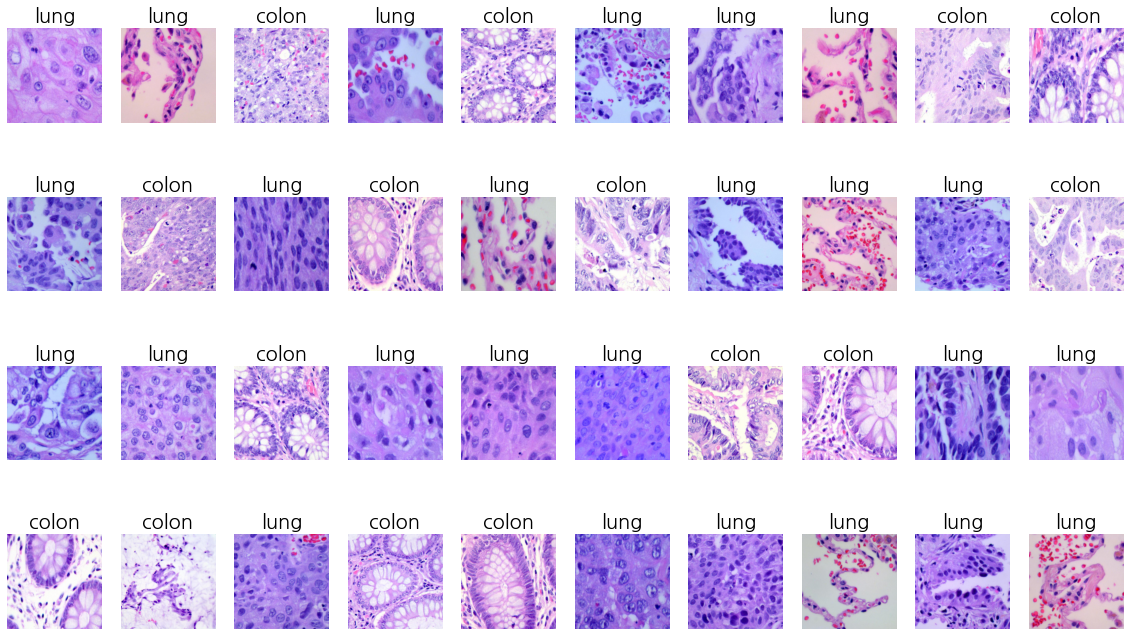

In [ ]:
# 학습용 데이터 (４0건)
show_images_labels(train_loader2, classes, None, None)

## 검증 이미지 데이터 확인

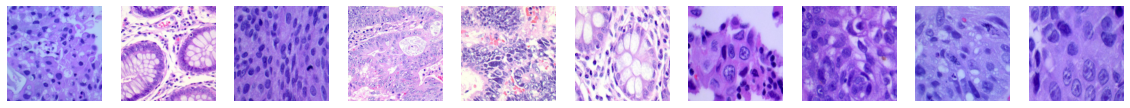

In [ ]:
# 검증용 데이터 (10건)
# 우선 정답 라벨 없이 이미지만을 표시합니다.
# 각 사진이 개와 늑대중 어떤 것인지 각자 판단해 보기 바랍니다.
torch_seed()
show_images_labels(test_loader2, ['', ''], None, None)

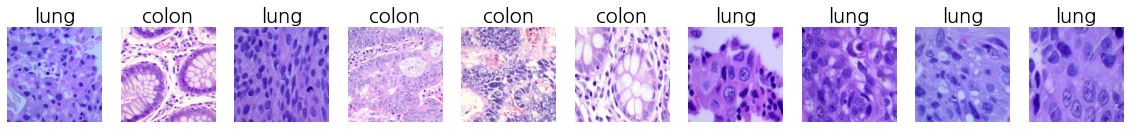

In [ ]:
# 검증용 데이터 (10건)
# 이것이 정답 데이터 입니다.
# 10건 중 몇 건의 정답을 맞췄습니까.
torch_seed()
show_images_labels(test_loader2, classes, None, None)

## 모델 구축

In [ ]:
class VitInputLayer(nn.Module): 
    def __init__(self, in_channels:int=3, emb_dim:int=384, num_patch_row:int=4, image_size:int=224):
        """ 
        인수 : 
            in_channels: 입력 이미지 채널 수
            emb_dim: 임베딩 벡터 길이
            num_patch_row: 높이 방향 패치 수. 예시는 2x2이므로 2를 기본값으로 함 
            image_size: 입력 이미지 한 변의 길이. 입력 이미지의 높이와 폭은 동일하다고 가정
        """
        super(VitInputLayer, self).__init__() 
        self.in_channels=in_channels 
        self.emb_dim = emb_dim 
        self.num_patch_row = num_patch_row 
        self.image_size = image_size
        
        # 패치 수
        ## 예: 입력 이미지를 2x2 패치로 나눴을 경우, num_patch는 4
        self.num_patch = self.num_patch_row**2

        # 패치 크기
        ## 예: 입력 이미지 한 변의 길이가 32인 경우, patch_size는 16 
        self.patch_size = int(self.image_size // self.num_patch_row)

        # 입력 이미지를 패치로 분할 & 패치 임베딩을 한번에 수행 
        self.patch_emb_layer = nn.Conv2d(
            in_channels=self.in_channels, 
            out_channels=self.emb_dim, 
            kernel_size=self.patch_size, 
            stride=self.patch_size
        )

        # CLS 토큰 
        self.cls_token = nn.Parameter(
            torch.randn(1, 1, emb_dim) 
        )

        # 위치 임베딩
        ## CLS 토큰이 앞에 결속되어 있기 때문에
        ## 길이 emb_dim의 위치 임베딩 벡터를 (패치 수 +1)개 준비 
        self.pos_emb = nn.Parameter(
            torch.randn(1, self.num_patch+1, emb_dim) 
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """ 
        인수:
            x: 입력 이미지. 사이즈는 (B, C, H, W)
                B: 배치 사이즈, C: 채널 수, H: 높이, W: 폭
        반환값:
            z_0: ViT로의 입력값. 사이즈는 (B, N, D)
                B: 배치 사이즈, N: 토큰 수, D: 임베딩 벡터 길이
        """
        # 패치 임베딩 & flatten
        ## 패치 임베딩 (B, C, H, W) -> (B, D, H/P, W/P) 
        ## 여기서 P는 패치 한 변의 길이
        z_0 = self.patch_emb_layer(x)

        ## 패치 flatten (B, D, H/P, W/P) -> (B, D, Np) 
        ## 여기서 Np는 패치 수(=H*W/Pˆ2)
        z_0 = z_0.flatten(2)

        ## axis 교환 (B, D, Np) -> (B, Np, D) 
        z_0 = z_0.transpose(1, 2)

        # 패치 임베딩 앞쪽에 CLS 토큰을 결합 
        ## (B, Np, D) -> (B, N, D)
        ## N = (Np + 1)
        ## cls_token의 사이즈는 (1,1,D) 이므로
        ## repeat 메서드가 (B,1,D)로 변환하고 나서 패치 임베딩과 결합 
        z_0 = torch.cat(
            [self.cls_token.repeat(repeats=(x.size(0),1,1)), z_0], dim=1)

        # 위치 임베딩을 더함 
        ## (B, N, D) -> (B, N, D) 
        z_0 = z_0 + self.pos_emb
        return z_0

In [ ]:
class MultiHeadSelfAttention(nn.Module): 
    def __init__(self, emb_dim:int=384, head:int=3, dropout:float=0.):
        """ 
        인수:
            emb_dim: 임베딩 벡터 길이 
            head: 헤드 수
            dropout: 드롭 아웃 확률
        """
        super(MultiHeadSelfAttention, self).__init__() 
        self.head = head
        self.emb_dim = emb_dim
        self.head_dim = emb_dim // head
        self.sqrt_dh = self.head_dim**0.5 # D_h의 제곱근. qk^T를 나누기 위한 계수

        # 입력을 q, k, v로 임베딩 하기 위한 선형층 
        self.w_q = nn.Linear(emb_dim, emb_dim, bias=False) 
        self.w_k = nn.Linear(emb_dim, emb_dim, bias=False) 
        self.w_v = nn.Linear(emb_dim, emb_dim, bias=False)

        # 드롭 아웃
        self.attn_drop = nn.Dropout(dropout)

        # MHSA 결과를 출력에 임베딩 하기 위한 선형층
        ## 식에는 없지만 드롭 아웃을 사용함 
        self.w_o = nn.Sequential(
            nn.Linear(emb_dim, emb_dim),
            nn.Dropout(dropout) 
        )

    def forward(self, z: torch.Tensor) -> torch.Tensor:
        """ 
        인수:
            z: MHSA로의 입력. 사이즈는 (B, N, D)
                B: 배치 사이즈, N: 토큰 수, D: 벡터 길이
        반환값:
            out: MHSA 출력. 사이즈는 (B, N, D)
                B: 배치 사이즈, N: 토큰 수, D: 임베딩 벡터 길이
        """

        batch_size, num_patch, _ = z.size()

        # 임베딩
        ## (B, N, D) -> (B, N, D)
        q = self.w_q(z)
        k = self.w_k(z)
        v = self.w_v(z)

        # q, k, v를 헤드로 나눔
        ## 먼저 벡터를 헤드 개수(h)로 나눔
        ## (B, N, D) -> (B, N, h, D//h)
        q = q.view(batch_size, num_patch, self.head, self.head_dim)
        k = k.view(batch_size, num_patch, self.head, self.head_dim)
        v = v.view(batch_size, num_patch, self.head, self.head_dim)

        ## Self-Attention을 계산할 수 있게
        ## (배치 사이즈, 헤드, 토큰 수, 패치 벡터) 형태로 변환 
        ## (B, N, h, D//h) -> (B, h, N, D//h)
        q = q.transpose(1,2)
        k = k.transpose(1,2)
        v = v.transpose(1,2)

        # 내적
        ## (B, h, N, D//h) -> (B, h, D//h, N)
        k_T = k.transpose(2, 3)
        ## (B, h, N, D//h) x (B, h, D//h, N) -> (B, h, N, N) 
        dots = (q @ k_T) / self.sqrt_dh
        ## 열 방향 소프트맥스 함수
        attn = F.softmax(dots, dim=-1)
        ## 드롭아웃
        attn = self.attn_drop(attn)
        # 가중합
        ## (B, h, N, N) x (B, h, N, D//h) -> (B, h, N, D//h) 
        out = attn @ v
        ## (B, h, N, D//h) -> (B, N, h, D//h)
        out = out.transpose(1, 2)
        ## (B, N, h, D//h) -> (B, N, D)
        out = out.reshape(batch_size, num_patch, self.emb_dim)

        # 출력층
        ## (B, N, D) -> (B, N, D) 
        out = self.w_o(out) 
        return out

In [ ]:
class VitEncoderBlock(nn.Module): 
    def __init__(self, emb_dim:int=384, head:int=4, hidden_dim:int=384*4, dropout:float=0.2):
        """
        인수:
            emb_dim: 임베딩 후 벡터 길이
            head: 헤드 수
            hidden_dim: Encoder Block에서 MLP 중간층의 벡터 길이 
                        논문에서와 같이 emb_dim의 4배를 디폴트로 함
            dropout: 드롭아웃 확률
        """
        super(VitEncoderBlock, self).__init__()
        # 첫번째 Layer Normalization
        self.ln1 = nn.LayerNorm(emb_dim)
        # MHSA
        self.msa = MultiHeadSelfAttention(
        emb_dim=emb_dim, head=head,
        dropout = dropout,
        )
        # 두번째 Layer Normalization
        self.ln2 = nn.LayerNorm(emb_dim)
        # MLP
        self.mlp = nn.Sequential( 
            nn.Linear(emb_dim, hidden_dim), 
            nn.GELU(),
            nn.Dropout(dropout), 
            nn.Linear(hidden_dim, emb_dim), 
            nn.Dropout(dropout)
        )
    def forward(self, z: torch.Tensor) -> torch.Tensor:
        """ 
        인수:
            z: Encoder Block으로 입력. 사이즈는 (B, N, D)
                B: 배치 사이즈, N: 토큰 수, D: 벡터 길이
        반환값:
            out: Encoder Block의 출력. 사이즈는 (B, N, D)
                B: 배치 사이즈, N: 토큰 수, D: 임베딩 벡터 길이 
        """
        # Encoder Block의 전반부 
        out = self.msa(self.ln1(z)) + z
        # Encoder Block의 후반부 
        out = self.mlp(self.ln2(out)) + out 
        return out

In [ ]:
class Vit(nn.Module): 
    def __init__(self, in_channels:int=3, num_classes:int=2, emb_dim:int=384, num_patch_row:int=4, image_size:int=224,
                 num_blocks:int=4, head:int=4, hidden_dim:int=384*4, dropout:float=0.2):
        """ 
        인수:
            in_channels: 입력 이미지의 채널 수
            num_classes: 이미지 분류 클래스 수
            emb_dim: 임베딩 후 벡터 길이
            num_patch_row: 한 변의 패치 수
            image_size: 입력 이미지의 한 변의 길이. 입력 이미지의 높이, 폭은 같은 길이를 가정 
            num_blocks: Encoder Block 수
            head: 헤드 수
            hidden_dim: Encoder Block의 MLP 중간층의 벡터 길이 
            dropout: 드롭아웃 확률
        """
        super(Vit, self).__init__()
        # Input Layer 
        self.input_layer = VitInputLayer(
            in_channels, 
            emb_dim, 
            num_patch_row, 
            image_size)

        # Encoder. Encoder Block 여러 층 
        self.encoder = nn.Sequential(*[
            VitEncoderBlock(
                emb_dim=emb_dim,
                head=head,
                hidden_dim=hidden_dim,
                dropout = dropout
            )
            for _ in range(num_blocks)])

        # MLP Head
        self.mlp_head = nn.Sequential(
            nn.LayerNorm(emb_dim),
            nn.Linear(emb_dim, num_classes)
        )

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        """
        인수:
            x: ViT로 입력되는 이미지. 사이즈는 (B, C, H, W)
                B: 배치 사이즈, C: 채널 수, H: 높이, W: 폭
        반환값:
            out: ViT의 출력. 사이즈는 (B, M)
                B: 배치 사이즈, M: 클래스 수 
        """
        # Input Layer
        ## (B, C, H, W) -> (B, N, D)
        ## N: 토큰 수(=배치 수+1), D: 벡터 길이 
        out = self.input_layer(x)
        
        # Encoder
        ## (B, N, D) -> (B, N, D)
        out = self.encoder(out)

        # 클래스 토큰만 꺼냄
        ## (B, N, D) -> (B, D)
        cls_token = out[:,0]

        # MLP Head
        ## (B, D) -> (B, M)
        pred = self.mlp_head(cls_token)
        return pred

In [ ]:
# 난수 고정
torch_seed()

# 마지막 노드의 출력을 2로 고정
num_classes = 2
channel = 3
vit = Vit(in_channels=channel, num_classes=num_classes) 

# GPU 사용
net = vit.to(device)

# 학습률
lr = 0.001

# 손실 함수로 교차 엔트로피 사용
criterion = nn.CrossEntropyLoss()

# 최적화함수 정의

# 파라미터 수정 대상을 마지막 노드로 제한함
optimizer = optim.SGD(net.parameters(),lr=lr,momentum=0.9)

# history 파일을 동시에 초기화
history = np.zeros((0, 5))

In [ ]:
# 모델 개요 표시
net = vit.to(device)
summary(net,(5, 3, 224, 224))

Layer (type:depth-idx)                        Output Shape              Param #
Vit                                           [5, 2]                    --
├─VitInputLayer: 1-1                          [5, 17, 384]              6,912
│    └─Conv2d: 2-1                            [5, 384, 4, 4]            3,613,056
├─Sequential: 1-2                             [5, 17, 384]              --
│    └─VitEncoderBlock: 2-2                   [5, 17, 384]              --
│    │    └─LayerNorm: 3-1                    [5, 17, 384]              768
│    │    └─MultiHeadSelfAttention: 3-2       [5, 17, 384]              590,208
│    │    └─LayerNorm: 3-3                    [5, 17, 384]              768
│    │    └─Sequential: 3-4                   [5, 17, 384]              1,181,568
│    └─VitEncoderBlock: 2-3                   [5, 17, 384]              --
│    │    └─LayerNorm: 3-5                    [5, 17, 384]              768
│    │    └─MultiHeadSelfAttention: 3-6       [5, 17, 384]            

## 학습

In [ ]:
# 반복 횟수
num_epochs = 50

# 학습 (공통함수)
history = fit(net, optimizer, criterion, num_epochs, train_loader, valid_loader, device, history)

  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [1/50], loss: 0.1091 acc: 0.7083 val_loss: 0.2562, val_acc: 0.6417
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [2/50], loss: 0.0649 acc: 0.8438 val_loss: 0.0570, val_acc: 0.8667
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [3/50], loss: 0.0583 acc: 0.8812 val_loss: 0.1462, val_acc: 0.7167
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [4/50], loss: 0.0709 acc: 0.8562 val_loss: 0.0503, val_acc: 0.9000
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [5/50], loss: 0.0512 acc: 0.9042 val_loss: 0.0594, val_acc: 0.8750
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [6/50], loss: 0.0556 acc: 0.8917 val_loss: 0.0946, val_acc: 0.8250
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [7/50], loss: 0.0504 acc: 0.8938 val_loss: 0.0510, val_acc: 0.8833
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [8/50], loss: 0.0409 acc: 0.9146 val_loss: 0.0596, val_acc: 0.8833
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [9/50], loss: 0.0398 acc: 0.9208 val_loss: 0.0573, val_acc: 0.8833
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [10/50], loss: 0.0539 acc: 0.8833 val_loss: 0.0525, val_acc: 0.8917
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [11/50], loss: 0.0394 acc: 0.9229 val_loss: 0.0588, val_acc: 0.9083
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [12/50], loss: 0.0335 acc: 0.9417 val_loss: 0.0655, val_acc: 0.8667
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [13/50], loss: 0.0405 acc: 0.9250 val_loss: 0.0532, val_acc: 0.9083
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [14/50], loss: 0.0366 acc: 0.9250 val_loss: 0.0508, val_acc: 0.9000
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [15/50], loss: 0.0318 acc: 0.9375 val_loss: 0.0480, val_acc: 0.8917
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [16/50], loss: 0.0346 acc: 0.9313 val_loss: 0.0614, val_acc: 0.9083
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [17/50], loss: 0.0345 acc: 0.9354 val_loss: 0.0463, val_acc: 0.9000
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [18/50], loss: 0.0282 acc: 0.9521 val_loss: 0.0548, val_acc: 0.9000
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [19/50], loss: 0.0346 acc: 0.9417 val_loss: 0.0440, val_acc: 0.9083
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [20/50], loss: 0.0262 acc: 0.9521 val_loss: 0.0602, val_acc: 0.9000
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [21/50], loss: 0.0267 acc: 0.9417 val_loss: 0.0470, val_acc: 0.9333
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [22/50], loss: 0.0285 acc: 0.9458 val_loss: 0.0423, val_acc: 0.9083
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [23/50], loss: 0.0249 acc: 0.9542 val_loss: 0.0384, val_acc: 0.9167
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [24/50], loss: 0.0210 acc: 0.9667 val_loss: 0.0499, val_acc: 0.9083
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [25/50], loss: 0.0188 acc: 0.9604 val_loss: 0.0391, val_acc: 0.9333
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [26/50], loss: 0.0221 acc: 0.9646 val_loss: 0.0413, val_acc: 0.9167
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [27/50], loss: 0.0175 acc: 0.9708 val_loss: 0.0380, val_acc: 0.9167
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [28/50], loss: 0.0166 acc: 0.9688 val_loss: 0.0391, val_acc: 0.9333
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [29/50], loss: 0.0194 acc: 0.9667 val_loss: 0.0292, val_acc: 0.9417
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [30/50], loss: 0.0183 acc: 0.9688 val_loss: 0.0481, val_acc: 0.9167
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [31/50], loss: 0.0135 acc: 0.9792 val_loss: 0.0296, val_acc: 0.9583
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [32/50], loss: 0.0143 acc: 0.9708 val_loss: 0.0716, val_acc: 0.9083
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [33/50], loss: 0.0148 acc: 0.9688 val_loss: 0.0263, val_acc: 0.9417
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [34/50], loss: 0.0166 acc: 0.9625 val_loss: 0.0557, val_acc: 0.9167
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [35/50], loss: 0.0133 acc: 0.9729 val_loss: 0.0261, val_acc: 0.9750
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [36/50], loss: 0.0139 acc: 0.9667 val_loss: 0.0470, val_acc: 0.9167
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [37/50], loss: 0.0094 acc: 0.9792 val_loss: 0.0273, val_acc: 0.9667
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [38/50], loss: 0.0100 acc: 0.9812 val_loss: 0.0290, val_acc: 0.9417
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [39/50], loss: 0.0120 acc: 0.9750 val_loss: 0.0398, val_acc: 0.9250
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [40/50], loss: 0.0100 acc: 0.9833 val_loss: 0.0257, val_acc: 0.9667
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [41/50], loss: 0.0076 acc: 0.9896 val_loss: 0.0429, val_acc: 0.9417
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [42/50], loss: 0.0126 acc: 0.9750 val_loss: 0.0431, val_acc: 0.9417
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [43/50], loss: 0.0164 acc: 0.9667 val_loss: 0.0247, val_acc: 0.9500
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [44/50], loss: 0.0057 acc: 0.9958 val_loss: 0.0297, val_acc: 0.9750
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [45/50], loss: 0.0114 acc: 0.9812 val_loss: 0.0330, val_acc: 0.9333
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [46/50], loss: 0.0063 acc: 0.9875 val_loss: 0.0256, val_acc: 0.9750
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [47/50], loss: 0.0078 acc: 0.9833 val_loss: 0.0459, val_acc: 0.9250
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [48/50], loss: 0.0090 acc: 0.9854 val_loss: 0.0487, val_acc: 0.9167
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [49/50], loss: 0.0048 acc: 0.9917 val_loss: 0.0339, val_acc: 0.9750
Saving..


  0%|          | 0/96 [00:00<?, ?it/s]

Epoch [50/50], loss: 0.0076 acc: 0.9875 val_loss: 0.0308, val_acc: 0.9667
Saving..


## 학습 결과 평가

초기상태 : 손실 : 0.25624  정확도 : 0.6417
최종상태 : 손실 : 0.03084 정확도 : 0.9667


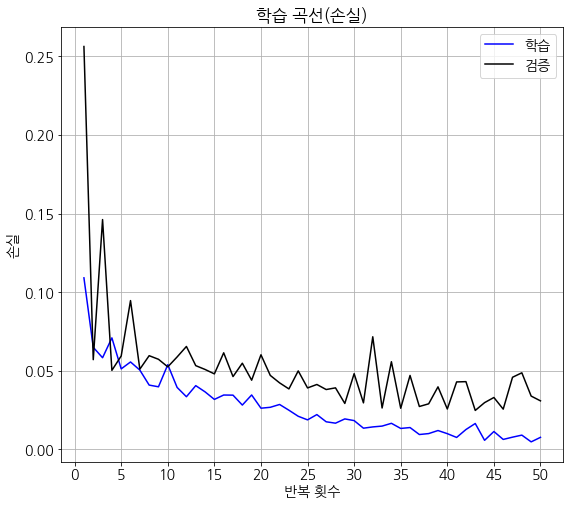

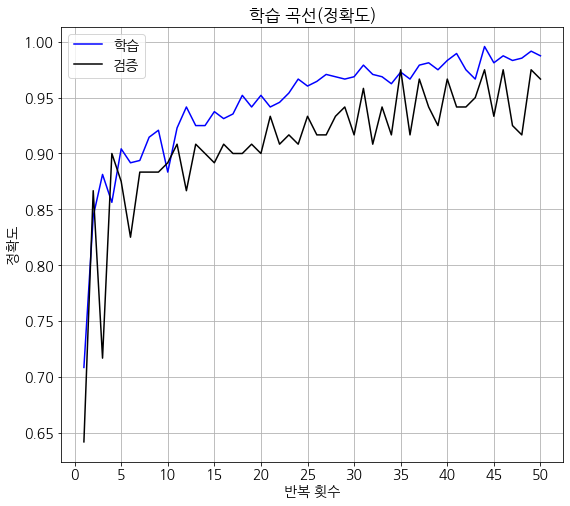

In [ ]:
# 결과 요약
evaluate_history(history)

## 결과 확인

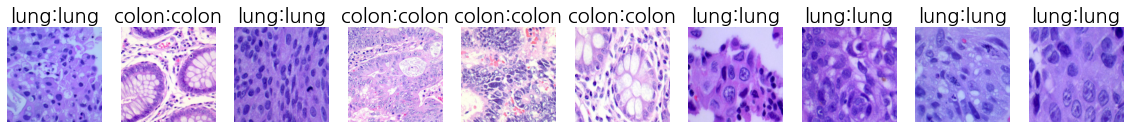

In [ ]:
# 검증 데이터를 대상으로 결과 확인 (9장 공통함수)
torch_seed()
show_images_labels(test_loader2, classes, net, device)